Figures for lowfc from brain_simulation_nodtu_lowfc/mode=gc_bias/post_type=gibbs_nrep=100_t=100/tree_analysis_updated_sim/compute_met.ipynb

#### Brain Sim lowfc

In [70]:
setwd('/fs/cbcb-lab/rob/students/noor/Uncertainity/treeTerminusScripts')
suppressPackageStartupMessages(library(tidyverse))
suppressPackageStartupMessages(library(ggplot2))
load("treeDE_Paper_Images/brain_sim_nodtu_lowfc/dfA.RData") ## Generated from http://localhost:8888/notebooks/brain_simulation_nodtu_lowfc/mode%3Dgc_bias/post_type%3Dgibbs_nrep%3D100_tf%3D100/tree_analysis_updated_sim/compute_met_updated.ipynb

In [3]:
dfA
dfA <- dfA %>% 
    mutate(keep_0.01=ifelse(FDR_0.01_FDR <= 0.01, T, F)) %>%
    mutate(keep_0.05=ifelse(FDR_0.05_FDR <= 0.05, T, F)) %>%
    mutate(keep_0.10=ifelse(FDR_0.10_FDR <= 0.10, T, F))
dfA[["Method"]] <- c("Txps", "trenDi", "treeclimbR(N)", "treeclimbR(L)", "Terminus", "Genes") 
dfA

Method,FDR_0.01_FDR,FDR_0.05_FDR,FDR_0.10_FDR,FDR_0.01_TPR,FDR_0.05_TPR,FDR_0.10_TPR,keep_0.01,keep_0.05,keep_0.10
<chr>,<named list>,<named list>,<named list>,<named list>,<named list>,<named list>,<lgl>,<lgl>,<lgl>
Txps,0.007,0.043,0.081,0.209,0.337,0.406,TRUE,TRUE,TRUE
treeDE,0.007,0.048,0.088,0.244,0.382,0.458,TRUE,TRUE,TRUE
treeclimbR(N),0.007,0.042,0.083,0.2,0.314,0.383,TRUE,TRUE,TRUE
treeclimbR(L),0.066,0.111,0.196,0.246,0.388,0.505,FALSE,FALSE,FALSE
Terminus,0.007,0.04,0.075,0.218,0.342,0.407,TRUE,TRUE,TRUE
Genes,0.007,0.042,0.075,0.334,0.448,0.509,TRUE,TRUE,TRUE


Method,FDR_0.01_FDR,FDR_0.05_FDR,FDR_0.10_FDR,FDR_0.01_TPR,FDR_0.05_TPR,FDR_0.10_TPR,keep_0.01,keep_0.05,keep_0.10
<chr>,<named list>,<named list>,<named list>,<named list>,<named list>,<named list>,<lgl>,<lgl>,<lgl>
Txps,0.007,0.043,0.081,0.209,0.337,0.406,TRUE,TRUE,TRUE
trenDi,0.007,0.048,0.088,0.244,0.382,0.458,TRUE,TRUE,TRUE
treeclimbR(N),0.007,0.042,0.083,0.2,0.314,0.383,TRUE,TRUE,TRUE
treeclimbR(L),0.066,0.111,0.196,0.246,0.388,0.505,FALSE,FALSE,FALSE
Terminus,0.007,0.04,0.075,0.218,0.342,0.407,TRUE,TRUE,TRUE
Genes,0.007,0.042,0.075,0.334,0.448,0.509,TRUE,TRUE,TRUE


In [5]:
df1 <- dfA %>% 
  pivot_longer(starts_with("FDR"),
  names_to = c("fdr", ".value"),
  names_pattern = "(.+)_(.+)"
  ) %>% select(fdr, FDR, TPR, Method)
df2 <- dfA %>% pivot_longer(starts_with("keep"), 
                    names_to = c(".value", "fdr"),
                    names_sep="_") %>% select(keep)
dfC <- bind_cols(df1, df2)
dfC$FDR <- unlist(dfC$FDR)
dfC$TPR <- unlist(dfC$TPR)
dfC

fdr,FDR,TPR,Method,keep
<chr>,<dbl>,<dbl>,<chr>,<lgl>
FDR_0.01,0.007,0.209,Txps,TRUE
FDR_0.05,0.043,0.337,Txps,TRUE
FDR_0.10,0.081,0.406,Txps,TRUE
FDR_0.01,0.007,0.244,trenDi,TRUE
FDR_0.05,0.048,0.382,trenDi,TRUE
FDR_0.10,0.088,0.458,trenDi,TRUE
FDR_0.01,0.007,0.200,treeclimbR(N),TRUE
FDR_0.05,0.042,0.314,treeclimbR(N),TRUE
FDR_0.10,0.083,0.383,treeclimbR(N),TRUE


In [6]:
size <- 24
pBrSimLow <- ggplot(dfC, aes(x = FDR, y = TPR, 
                             color = Method,
                             fill = ifelse(keep, Method, NA))) + 
                geom_point(size=5,shape=21) + 
                scale_fill_discrete(na.value = "transparent") +
                geom_line() +
                theme_bw() +
                geom_vline(xintercept = c(0.01, 0.05, 0.1), linetype = "dashed") +
                ggtitle("BrSimLow Dataset") +
                theme(axis.title = element_text(size = size),
                plot.title = element_text(size = size + 1, hjust=0.5),
                axis.text = element_text(size = size),
                legend.text = element_text(size = size),
                legend.title = element_text(size = size),
                legend.position = "bottom") +
                guides(fill = "none")

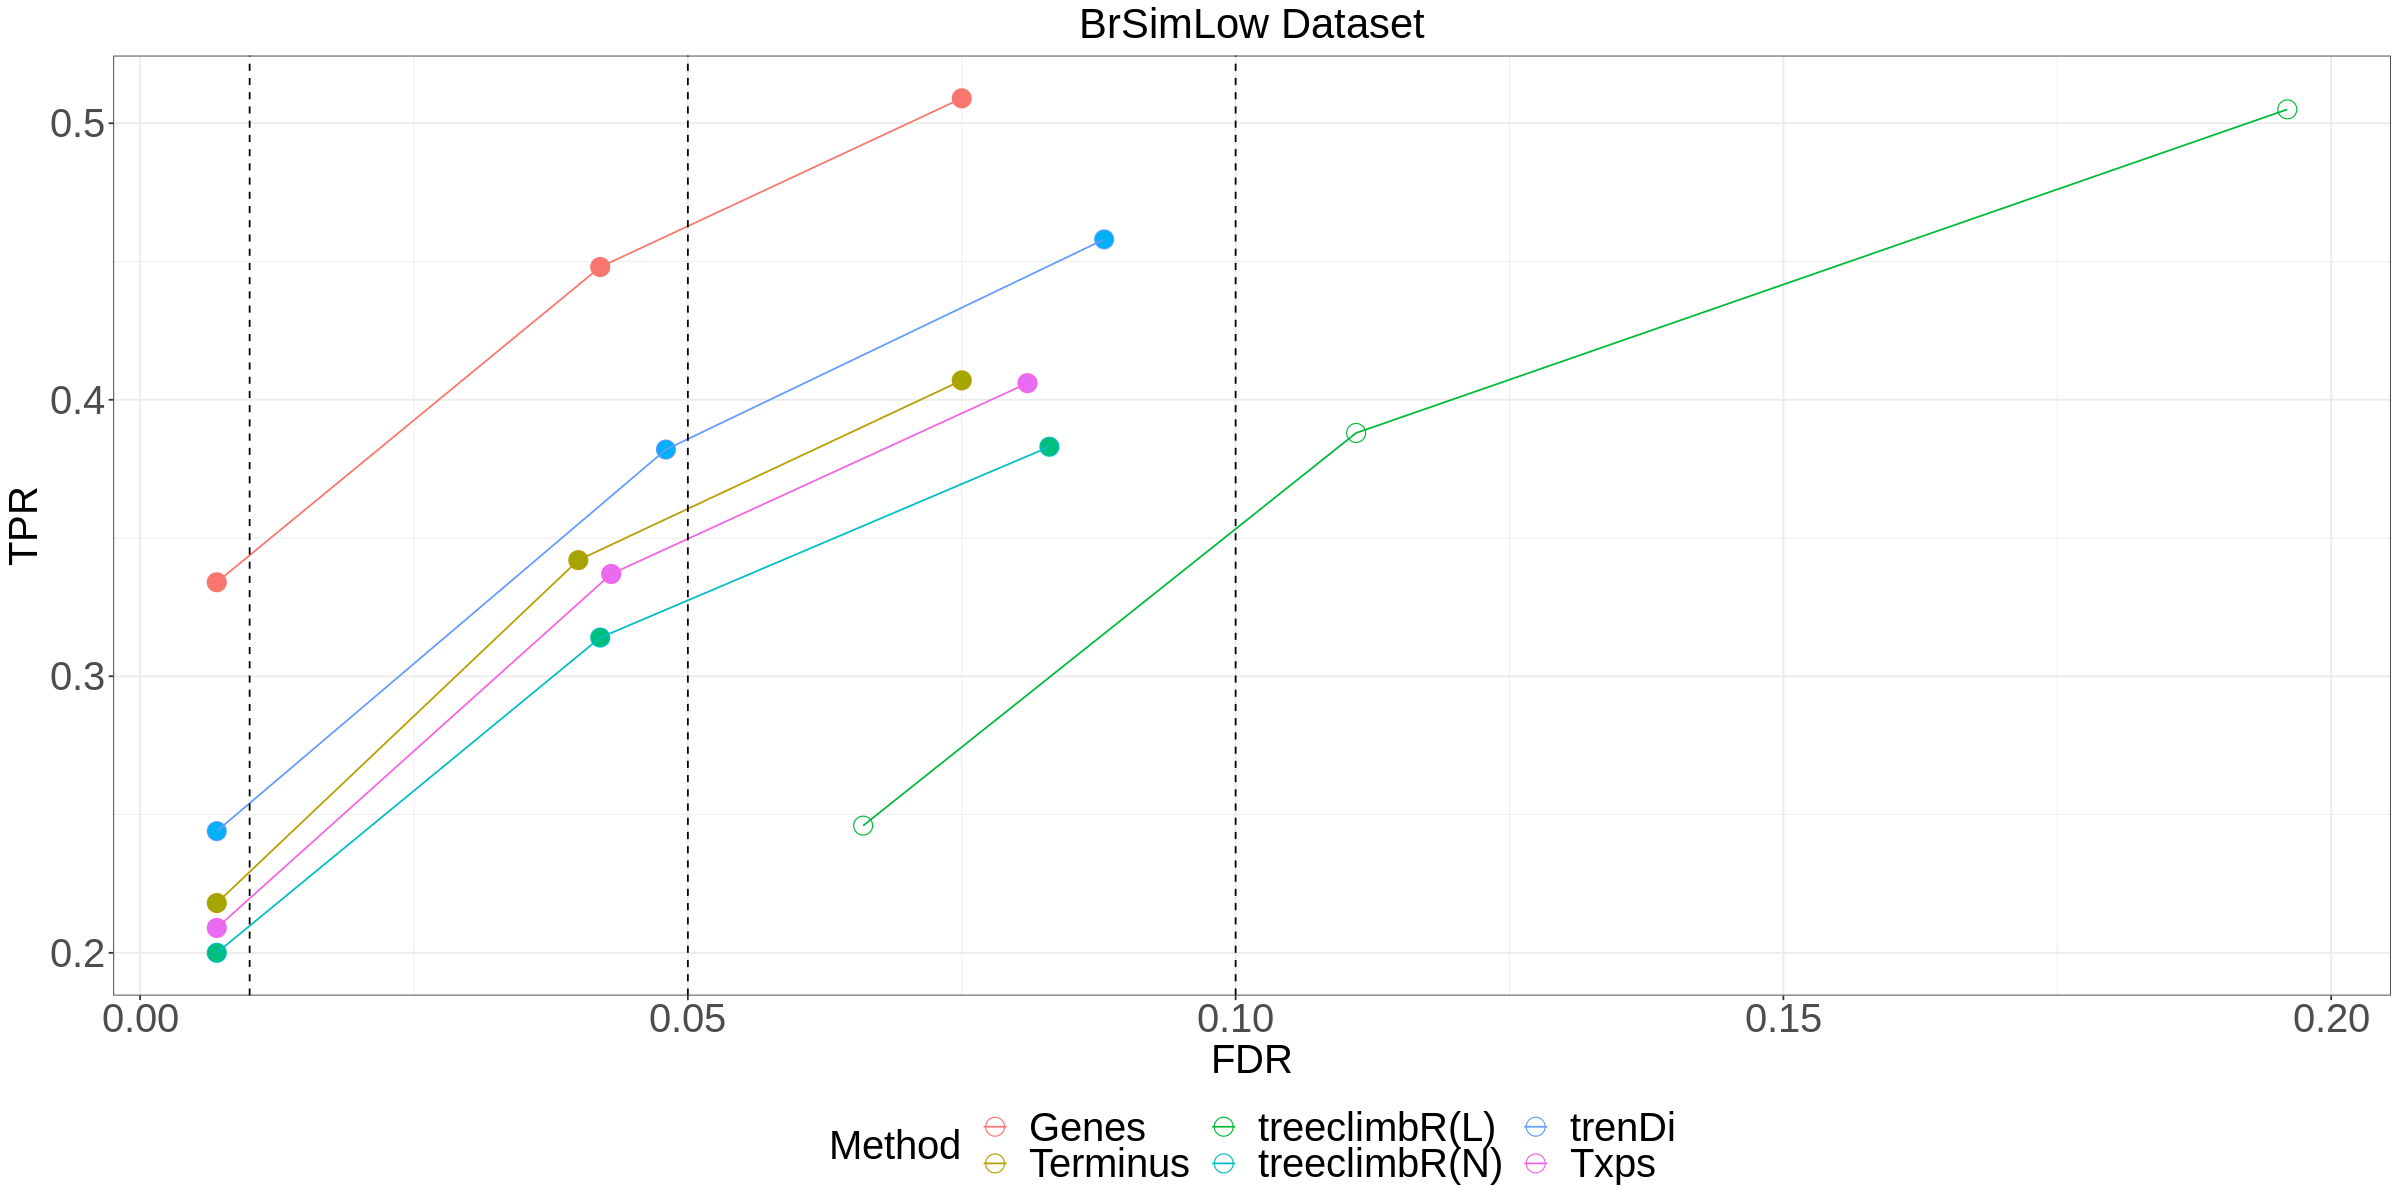

In [7]:
options(repr.plot.width=20, repr.plot.height=10)
pBrSimLow

In [79]:
suppressPackageStartupMessages(source("tree_helper_function.R"))
suppressPackageStartupMessages(source("tree_term_climb.R"))
suppressPackageStartupMessages(library(beaveR))
quantDir <- "/fs/cbcb-scratch/jfan03/treeterm-paper/output/seed=1_fc=1.4:2.8/post_type=gibbs_nrep=100_tf=100/salmon_quants"
saveDir <- "environment/brain_sim_nodtu/mode=gc_bias/post_type=gibbs_nrep=100_tf=100/comp_trees_updated_sim"
samples <- as.vector(outer(c(1:6), c(1,2), function(x,y) paste(x,y,sep="_")))
                           
files <- file.path(quantDir, samples, "quant.sf")
coldata <- data.frame(files = files, names = samples, condition = as.factor(rep(c(1,2),each=6)))
clustFile <- "/fs/cbcb-scratch/jfan03/treeterm-paper/output/seed=1_fc=1.4:2.8/post_type=gibbs_nrep=100_tf=100/terminus/no_threshold0/cluster_nwk.txt"
tseCons <- buildTSE(treeTermFile = clustFile, coldata = coldata)
treeCons <- rowTree(tseCons)
l <- length(treeCons$tip)
termFile <- "/fs/cbcb-scratch/jfan03/treeterm-paper/output/seed=1_fc=1.4:2.8/post_type=gibbs_nrep=100_tf=100/terminus/old/1_1/clusters.txt"

reading tree

importing quantifications

reading in files with read_tsv

1 
2 
3 
4 
5 
6 
7 
8 
9 
10 
11 
12 


found matching transcriptome:
[ GENCODE - Homo sapiens - release 26 ]

loading existing TxDb created: 2023-03-02 17:08:07

loading existing transcript ranges created: 2023-03-02 21:45:10

Missing txps 3911

Aggregation Started

Aggregation Ended



In [80]:
load("/fs/cbcb-scratch/jfan03/treeterm-paper/output/seed=1_fc=1.4:2.8/sim_expr.rda")
suppressPackageStartupMessages(library(TreeSummarizedExperiment))
suppressPackageStartupMessages(library(ape))

missingTxps <- setdiff(treeCons$tip.label, rownames(sim.counts.mat))
dts <- Reduce(union, c(names(iso.dge)[iso.dge], names(iso.dte)[iso.dte], names(iso.dte.only)[iso.dte.only], 
                       names(iso.dtu)[iso.dtu]))
dts <- intersect(dts, rownames(sim.counts.mat))
sim.counts.mat <- rbind(sim.counts.mat, matrix(0, nrow = length(missingTxps), ncol = ncol(sim.counts.mat),
                                               dimnames = list(missingTxps, colnames(sim.counts.mat))))
sim.counts.mat <- sim.counts.mat[treeCons$tip.label,]
dts <- intersect(dts, rownames(sim.counts.mat))

innNodes <- l+1:treeCons$Nnode
aggCountsNodes <- computeAggNodesU(treeCons, c(1:length(treeCons$tip),innNodes), sim.counts.mat)
logFCNodes <- ifelse(rowSums(aggCountsNodes)==0, 0, log2(aggCountsNodes[,2]+1)-log2(aggCountsNodes[,1]+1))
names(logFCNodes)[(l+1):length(logFCNodes)] <- paste("Node", names(logFCNodes)[(l+1):length(logFCNodes)], sep="")
rootFC <- abs(logFCNodes[l+1])

suppressPackageStartupMessages(source("old_terminus_helper.R"))
yTermThrNS <- tseCons[1:l,]
groupsClust <- parseClustFile(termFile, yTermThrNS)
mInds <- seq(nrow(yTermThrNS) + length(groupsClust))
aggCountsNodes <- computeOAggNodesU(groupsClust, mInds, sim.counts.mat)
logFCNodesTerm <- ifelse(rowSums(aggCountsNodes)==0, 0, log2(aggCountsNodes[,2]+1)-log2(aggCountsNodes[,1]+1))

In [85]:
load("treeDE_Paper_Images/brain_sim_nodtu_lowfc/detNodes.RData")

In [91]:
i <- 1
treeDETxps <- rownames(tseCons)[unlist(Descendants(treeCons, detNodes[["treeDEFDR_OL"]][[i]]))]
treeClimbTxps <- rownames(tseCons)[unlist(Descendants(treeCons, detNodes[["treeClimbR"]][[i]]))]

dN <- detNodes[["term"]][[i]]

termTxps <- c(names(logFCNodesTerm)[dN][startsWith(names(logFCNodesTerm)[dN], "ENS")],
  names(logFCNodesTerm)[as.numeric(unlist(groupsClust[names(logFCNodesTerm)[dN][!startsWith(names(logFCNodesTerm)[dN], "ENS")]]))])

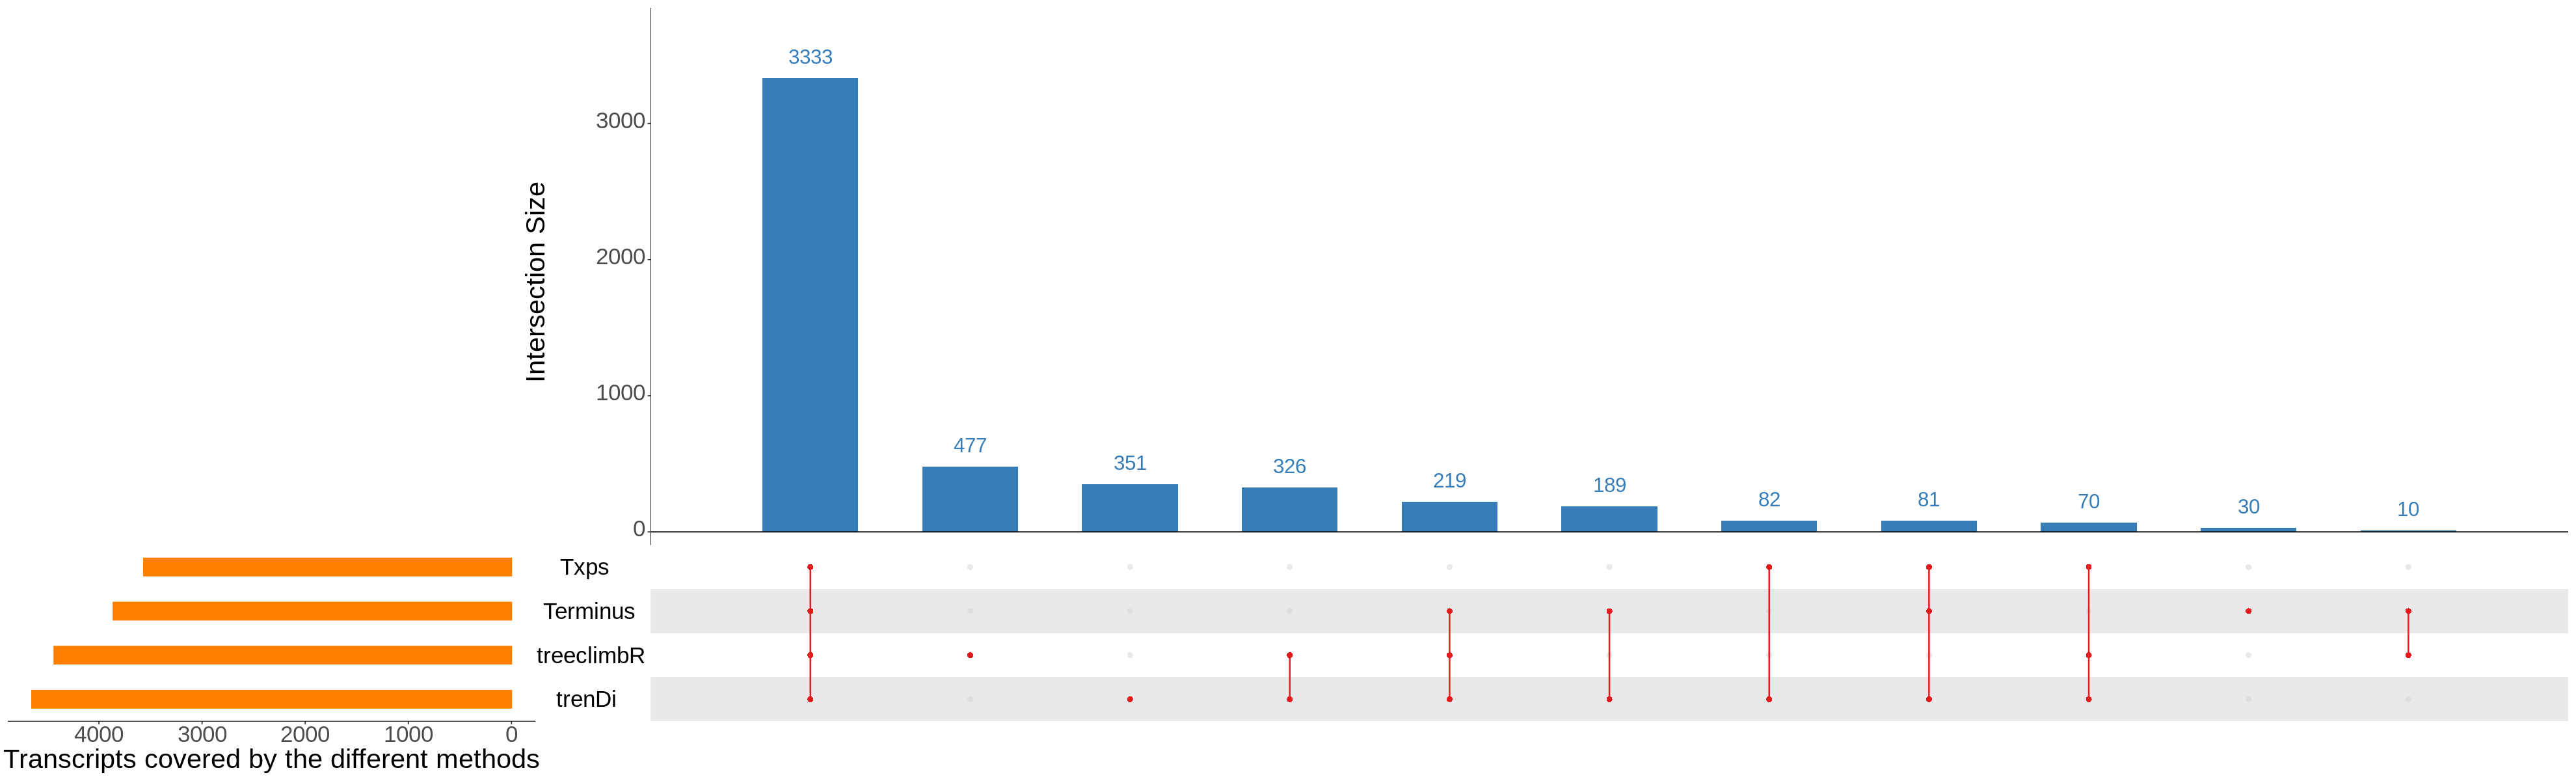

In [90]:
options(repr.plot.width=33, repr.plot.height=10)
suppressPackageStartupMessages(library(UpSetR))
txpMethods = lapply(list(Txps = rownames(tseCons)[detNodes[[1]][[i]]], 
                 trenDi = treeDETxps, 
                 treeclimbR = treeClimbTxps, 
                 Terminus = termTxps
                 ), function(nodes) intersect(nodes, dts))
upsetData <- fromList(txpMethods)
size <- 3
upset(upsetData, order.by = "freq",
     main.bar.color = "#377eb8", 
     matrix.color = "#e41a1c",
     sets.bar.color = c("#ff7f00"),
     sets.x.label = "Transcripts covered by the different methods",
     shade.alpha = 0.7, 
     text.scale = c(size, size, size, size, size, size)
)

#### BrSimNorm

In [64]:
load("treeDE_Paper_Images//brain_sim_nodtu/dfA.RData")
load("treeDE_Paper_Images/brain_sim_nodtu/detNodes.RData")
dfA <- dfA %>% 
    mutate(keep_0.01=ifelse(FDR_0.01_FDR <= 0.01, T, F)) %>%
    mutate(keep_0.05=ifelse(FDR_0.05_FDR <= 0.05, T, F)) %>%
    mutate(keep_0.10=ifelse(FDR_0.10_FDR <= 0.10, T, F))
dfA[["Method"]] <- c("Txps", "trenDi", "treeclimbR(N)", "treeclimbR(L)", "Terminus", "Genes") 

In [11]:
df1 <- dfA %>% 
  pivot_longer(starts_with("FDR"),
  names_to = c("fdr", ".value"),
  names_pattern = "(.+)_(.+)"
  ) %>% select(fdr, FDR, TPR, Method)
df2 <- dfA %>% pivot_longer(starts_with("keep"), 
                    names_to = c(".value", "fdr"),
                    names_sep="_") %>% select(keep)
dfC <- bind_cols(df1, df2)
dfC$FDR <- unlist(dfC$FDR)
dfC$TPR <- unlist(dfC$TPR)

In [12]:
size <- 24
pBrSimNorm <- ggplot(dfC, aes(x = FDR, y = TPR, 
                             color = Method                            
                             )) + 
                geom_point(size=5,shape=21, aes(fill = ifelse(keep, Method, NA))) + 
                scale_fill_discrete(na.value = "transparent") +
                geom_line() +
                theme_bw() +
                geom_vline(xintercept = c(0.01, 0.05, 0.1), linetype = "dashed") +
                ggtitle("BrSimNorm Dataset") +
                theme(axis.title = element_text(size = size),
                plot.title = element_text(size = size + 1, hjust=0.5),
                axis.text = element_text(size = size),
                legend.text = element_text(size = size),
                legend.title = element_text(size = size),
                legend.position = "bottom") +
                guides(fill = "none")

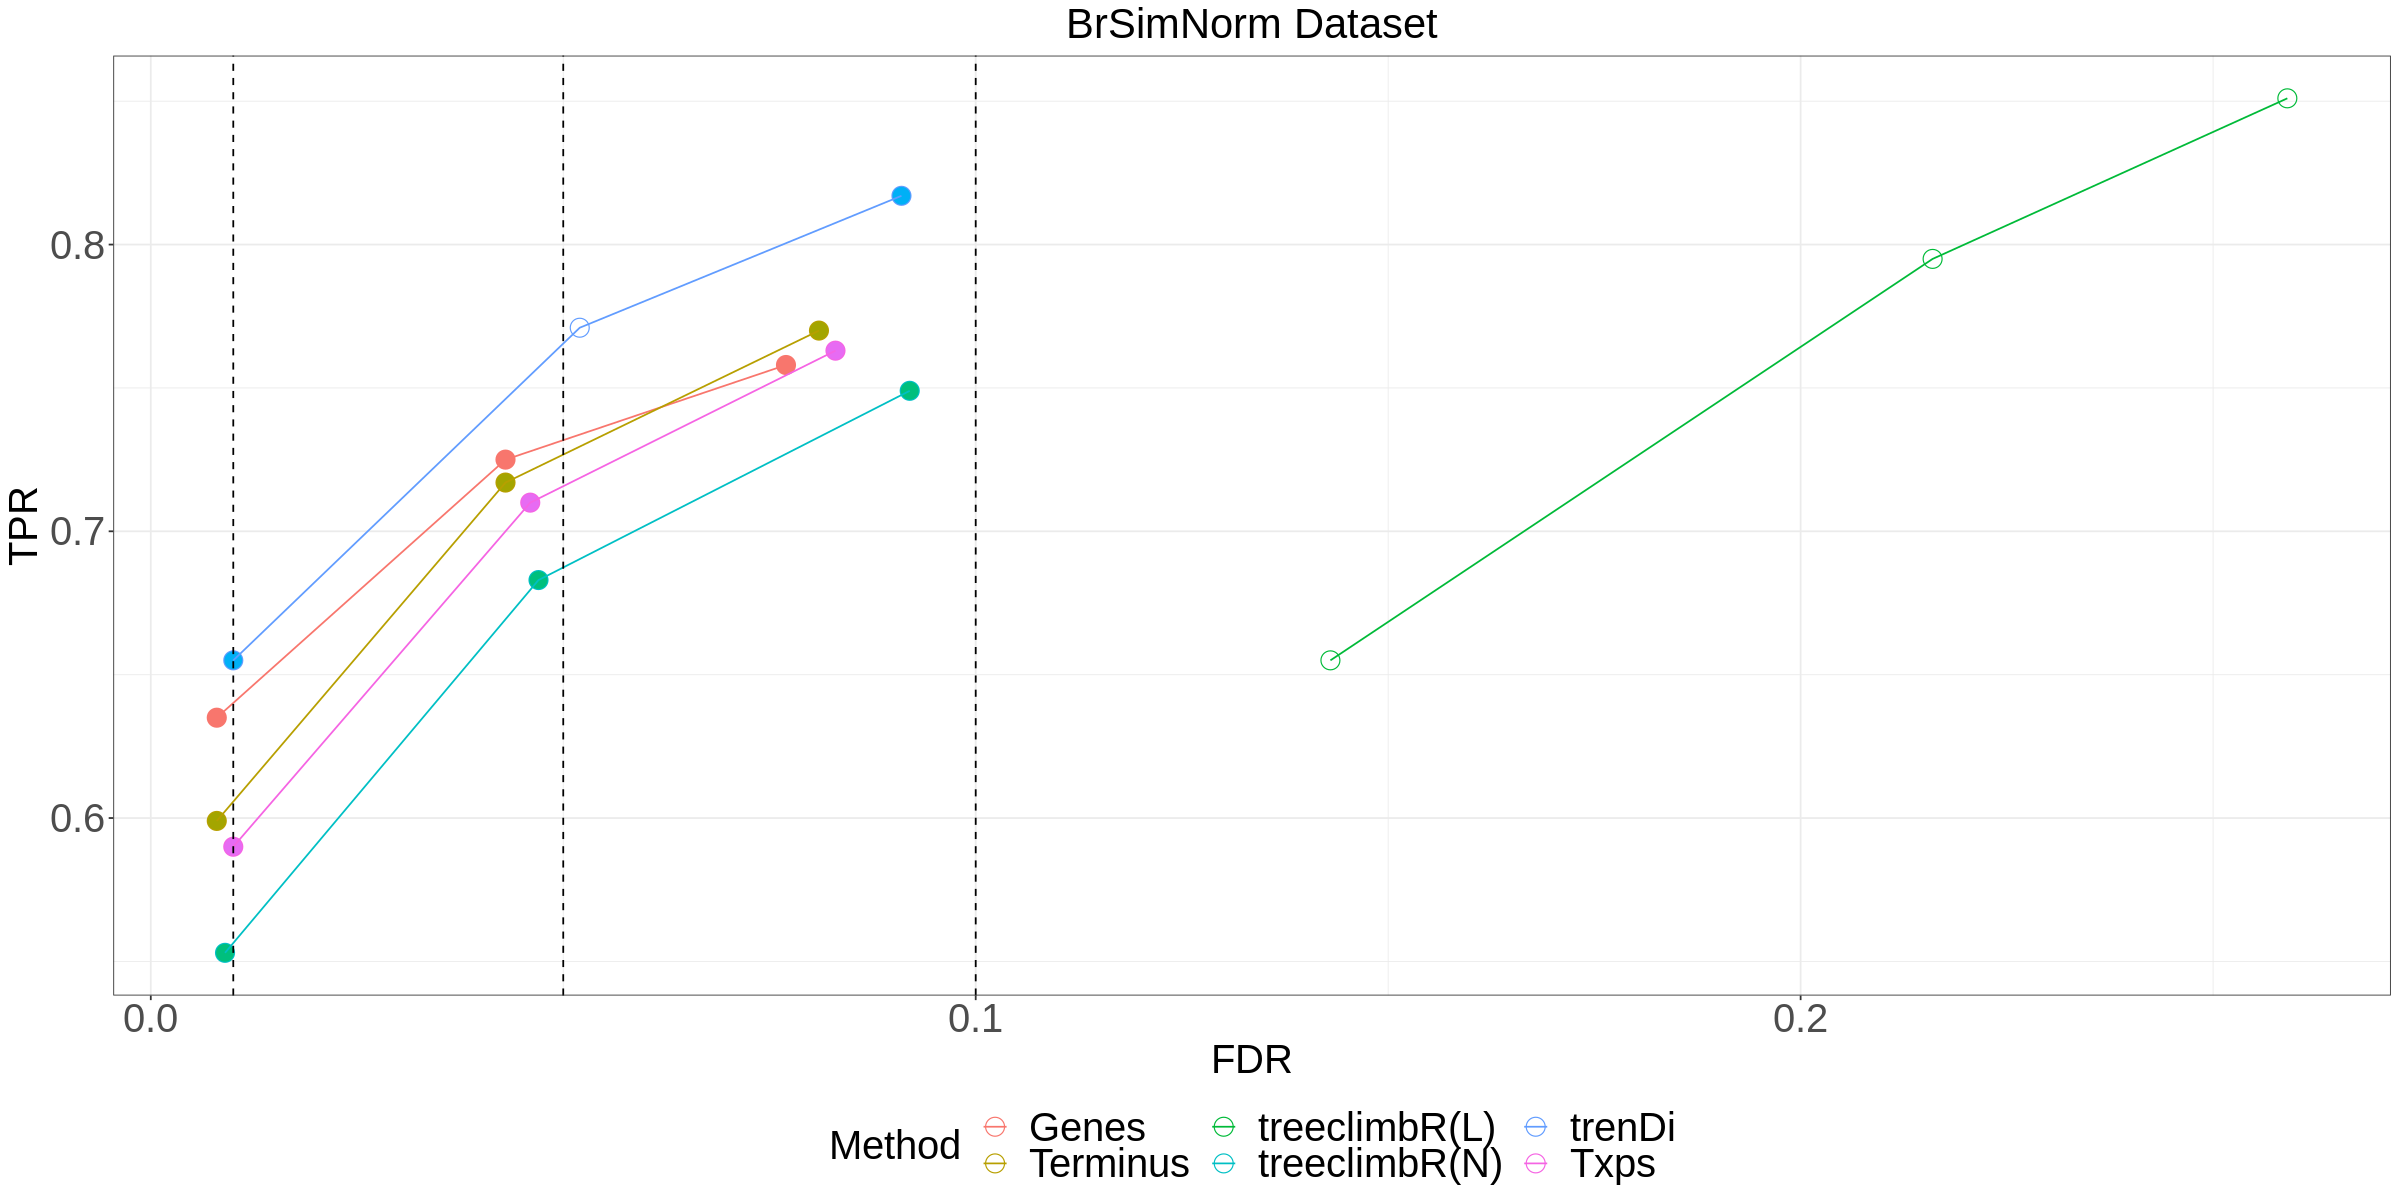

In [13]:
pBrSimNorm

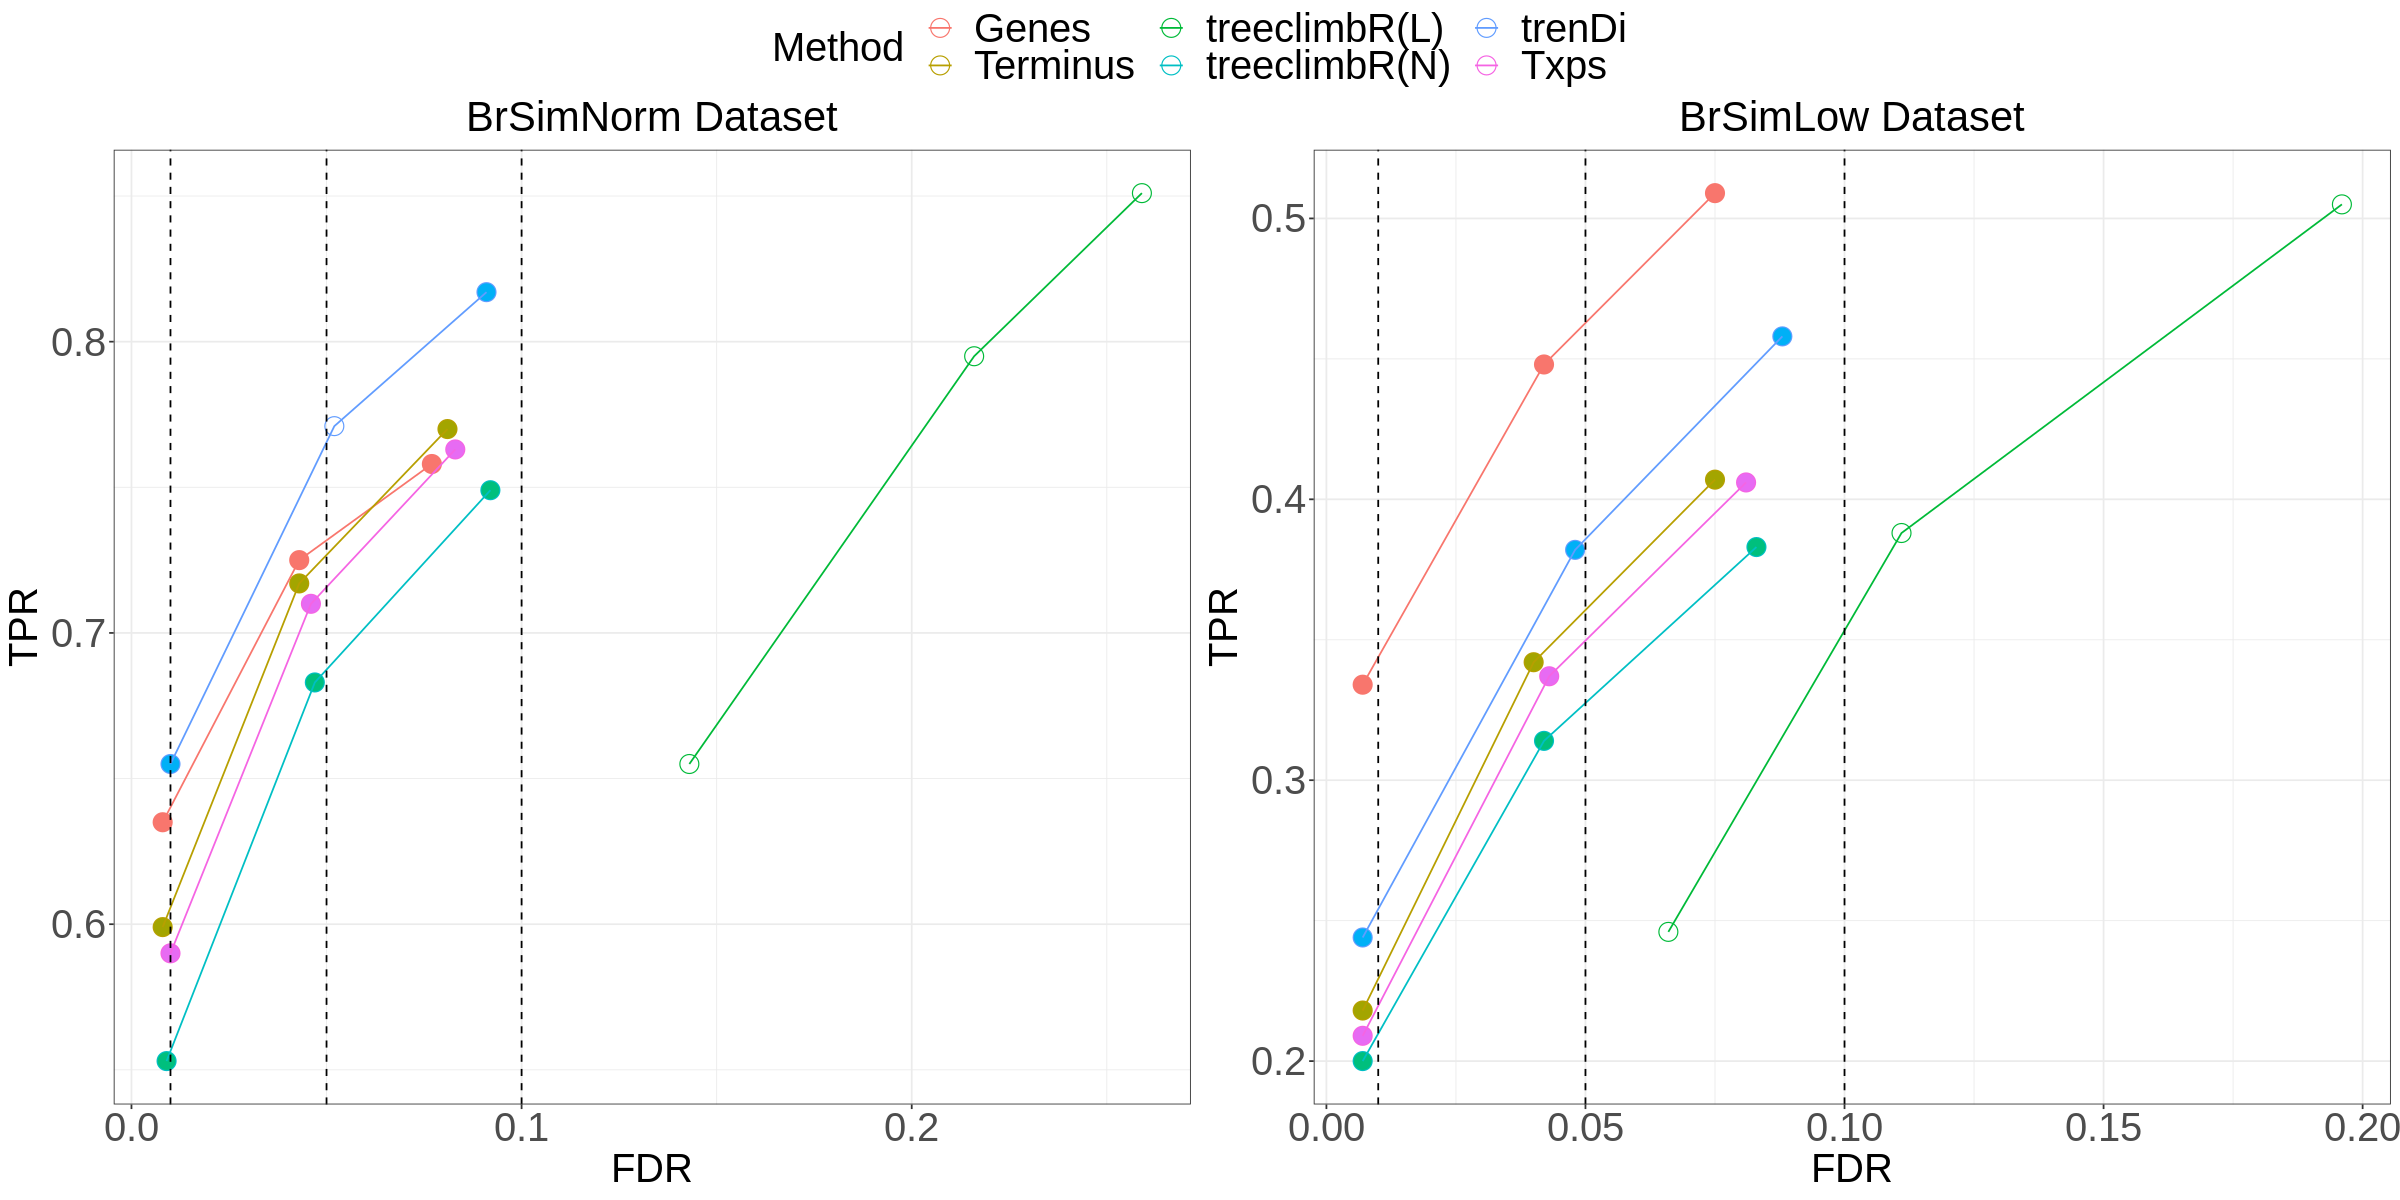

In [14]:
options(repr.plot.width=20, repr.plot.height=10)
suppressPackageStartupMessages(library(ggpubr))
ggarrange(pBrSimNorm, pBrSimLow, common.legend = TRUE)

In [113]:
quantDir <- "/fs/cbcb-scratch/jfan03/treeterm-paper/output/seed=1_fc=2:6/post_type=gibbs_nrep=100_tf=100/salmon_quants"
samples <- as.vector(outer(c(1:6), c(1,2), function(x,y) paste(x,y,sep="_")))
files <- file.path(quantDir, samples, "quant.sf")
coldata <- data.frame(files = files, names = samples, condition = as.factor(rep(c(1,2),each=6)))
clustFile <- "/fs/cbcb-scratch/jfan03/treeterm-paper/output/seed=1_fc=2:6/post_type=gibbs_nrep=100_tf=100/terminus/no_threshold0/cluster_nwk.txt"
tseCons <- buildTSE(treeTermFile = clustFile, coldata = coldata)
treeCons <- rowTree(tseCons)
l <- length(treeCons$tip)
termFile <- "/fs/cbcb-scratch/jfan03/treeterm-paper/output/seed=1_fc=2:6/post_type=gibbs_nrep=100_tf=100/terminus/old/1_1/clusters.txt"

reading tree

importing quantifications

reading in files with read_tsv

1 
2 
3 
4 
5 
6 
7 
8 
9 
10 
11 
12 


found matching transcriptome:
[ GENCODE - Homo sapiens - release 26 ]

loading existing TxDb created: 2023-03-02 17:08:07

loading existing transcript ranges created: 2023-03-02 21:45:10

Missing txps 3817

Aggregation Started

Aggregation Ended



In [114]:
load("/fs/cbcb-scratch/jfan03/treeterm-paper/output/seed=1_fc=2:6/sim_expr.rda")
load("treeDE_Paper_Images/brain_sim_nodtu/detNodes.RData")
suppressPackageStartupMessages(library(TreeSummarizedExperiment))
suppressPackageStartupMessages(library(ape))

missingTxps <- setdiff(treeCons$tip.label, rownames(sim.counts.mat))
dts <- Reduce(union, c(names(iso.dge)[iso.dge], names(iso.dte)[iso.dte], names(iso.dte.only)[iso.dte.only], 
                       names(iso.dtu)[iso.dtu]))
dts <- intersect(dts, rownames(sim.counts.mat))
sim.counts.mat <- rbind(sim.counts.mat, matrix(0, nrow = length(missingTxps), ncol = ncol(sim.counts.mat),
                                               dimnames = list(missingTxps, colnames(sim.counts.mat))))
sim.counts.mat <- sim.counts.mat[treeCons$tip.label,]
dts <- intersect(dts, rownames(sim.counts.mat))

innNodes <- l+1:treeCons$Nnode
aggCountsNodes <- computeAggNodesU(treeCons, c(1:length(treeCons$tip),innNodes), sim.counts.mat)
logFCNodes <- ifelse(rowSums(aggCountsNodes)==0, 0, log2(aggCountsNodes[,2]+1)-log2(aggCountsNodes[,1]+1))
names(logFCNodes)[(l+1):length(logFCNodes)] <- paste("Node", names(logFCNodes)[(l+1):length(logFCNodes)], sep="")
rootFC <- abs(logFCNodes[l+1])

suppressPackageStartupMessages(source("old_terminus_helper.R"))
yTermThrNS <- tseCons[1:l,]
groupsClust <- parseClustFile(termFile, yTermThrNS)
mInds <- seq(nrow(yTermThrNS) + length(groupsClust))
aggCountsNodes <- computeOAggNodesU(groupsClust, mInds, sim.counts.mat)
logFCNodesTerm <- ifelse(rowSums(aggCountsNodes)==0, 0, log2(aggCountsNodes[,2]+1)-log2(aggCountsNodes[,1]+1))

In [118]:
i <- 1
table(node.depth(treeCons, 2)[detNodes$treeClimbR[[i]]])
table(node.depth(treeCons, 2)[detNodes$treeDEFDR_OL[[i]]])


   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
2914  326  164  116   80   57   38   28   15   14   13    5    5    6    4    1 
  17   18   19 
   3    1    1 


   1    2    3    4    5    6    7    8    9   10   11   12   13   14 
4013  554  256  125   62   28   12    9    4    4    1    2    1    1 

In [116]:
treeDETxps <- rownames(tseCons)[unlist(Descendants(treeCons, detNodes[["treeDEFDR_OL"]][[i]]))]
treeClimbTxps <- rownames(tseCons)[unlist(Descendants(treeCons, detNodes[["treeClimbR"]][[i]]))]

dN <- detNodes[["term"]][[i]]

termTxps <- c(names(logFCNodesTerm)[dN][startsWith(names(logFCNodesTerm)[dN], "ENS")],
  names(logFCNodesTerm)[as.numeric(unlist(groupsClust[names(logFCNodesTerm)[dN][!startsWith(names(logFCNodesTerm)[dN], "ENS")]]))])

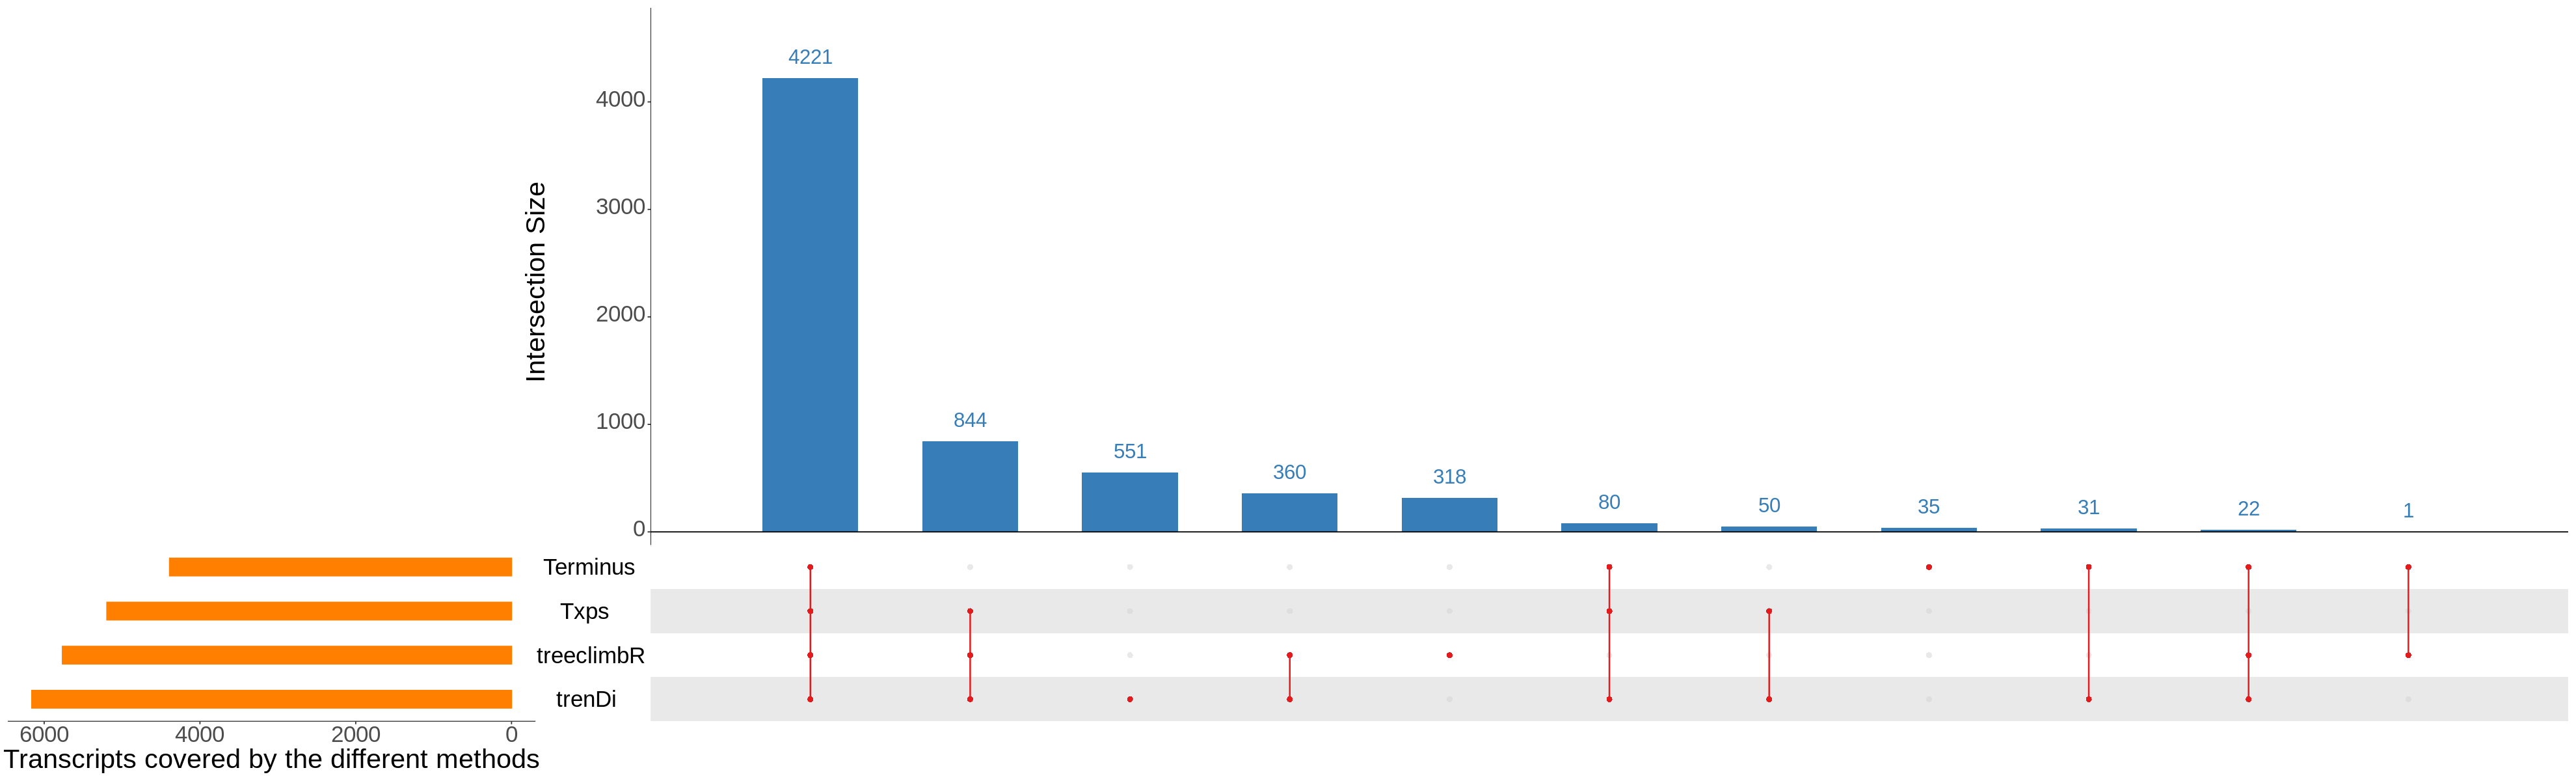

In [117]:
options(repr.plot.width=33, repr.plot.height=10)
suppressPackageStartupMessages(library(UpSetR))
txpMethods = lapply(list(Txps = rownames(tseCons)[detNodes[[1]][[i]]], 
                 trenDi = treeDETxps, 
                 treeclimbR = treeClimbTxps, 
                 Terminus = termTxps
                 ), function(nodes) intersect(nodes, dts))
upsetData <- fromList(txpMethods)
size <- 3
upset(upsetData, order.by = "freq",
     main.bar.color = "#377eb8", 
     matrix.color = "#e41a1c",
     sets.bar.color = c("#ff7f00"),
     sets.x.label = "Transcripts covered by the different methods",
     shade.alpha = 0.7, 
     text.scale = c(size, size, size, size, size, size)
)